# Objective 
- Explore various NLP Models and techniques on Text data
- Get Insight which model is best and could be the to propose some interactive product(web, chatbot)


# Progress
- Looking for data_set and platform + region
- at moment working on Merged chat data set shared by Juber
- Collaboration with visulization 

# NLP on dataset "merged_chat_coder.csv
In this notebook we have implemented 
- POS:Part of Speech
- Chunking /Shallow Parsing 
- NER: Named Entity Recognition
- NGrams


In [9]:
#import library 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#loading file
df = pd.read_csv("merged_chat_coder.csv") 

In [3]:
#dataview
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

There are 827591 rows and 4 columns


,Unnamed: 0,author,time,message
0,0,krazythug_692000,08/05/09 10:47:07 PM,hey
1,1,krazythug_692000,08/05/09 10:47:10 PM,how r u
2,2,yayitskc95,08/05/09 10:48:04 PM,fine ty you?
3,3,krazythug_692000,08/05/09 10:48:10 PM,im ok
4,4,krazythug_692000,08/05/09 10:48:17 PM,what u up to tonight


In [4]:
#checking nullvalues
print(df.isnull().sum()) 

Unnamed: 0        0
author            0
time          21779
message        7241
dtype: int64


In [5]:
#fie information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827591 entries, 0 to 827590
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  827591 non-null  int64 
 1   author      827591 non-null  object
 2   time        805812 non-null  object
 3   message     820350 non-null  object
dtypes: int64(1), object(3)
memory usage: 25.3+ MB


In [6]:
#dropping Null values
data_frame = df.dropna()

In [7]:
#Checking Null values
print(data_frame.isnull().sum()) 

Unnamed: 0    0
author        0
time          0
message       0
dtype: int64


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800572 entries, 0 to 827590
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  800572 non-null  int64 
 1   author      800572 non-null  object
 2   time        800572 non-null  object
 3   message     800572 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [22]:
#creating new datafram on Message filed
message_df = data_frame['message']
message_df = message_df.to_frame()
message_df.sample(n=10, random_state = 5)

,message
739850,ask alot of questions though lol
295234,yeah. who's going to take you?
802919,I know what to do with a girl on my lap
534552,they must look nice on you
366942,realy
823383,its up to u
823744,jeep
61317,shes on
725536,but you have to know how she is right?
89426,i c


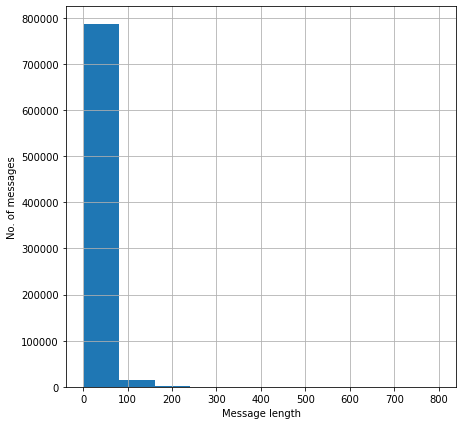

In [23]:
#Plot to check messages length and count
plt.figure(figsize=(7,7))
plt.xlabel("Message length")
plt.ylabel("No. of messages")

message_df['message'].str.len().hist()

# Part of Speech(POS) Tagging

In [24]:

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Erum\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
!pip install contractions
import contractions

In [26]:

message_df['message'] = message_df['message'].apply(lambda x: [contractions.fix(word) for word in x.split()])


In [27]:
message_df.sample(n=10, random_state = 5)

,message
739850,"[ask, alot, of, questions, though, lol]"
295234,"[yeah., who is, going, to, take, you?]"
802919,"[I, know, what, to, do, with, a, girl, on, my,..."
534552,"[they, must, look, nice, on, you]"
366942,[realy]
823383,"[its, up, to, you]"
823744,[jeep]
61317,"[she is, on]"
725536,"[but, you, have, to, know, how, she, is, right?]"
89426,"[i, c]"


In [28]:
message_df['message'] = [' '.join(map(str, l)) for l in message_df['message']]
message_df.sample(n=10, random_state = 5)

,message
739850,ask alot of questions though lol
295234,yeah. who is going to take you?
802919,I know what to do with a girl on my lap
534552,they must look nice on you
366942,realy
823383,its up to you
823744,jeep
61317,she is on
725536,but you have to know how she is right?
89426,i c


In [29]:
print(message_df['message'][0])
print(type(message_df['message'][0]))


hey
<class 'str'>


In [31]:
# Noise reduction, special characters and lowering case etc.
import regex as re
message_df['message'] = message_df['message'].str.lower()
message_df['message']= message_df['message'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

message_df.sample(10, random_state = 5)

,message
739850,ask alot of questions though lol
295234,yeah who is going to take you
802919,i know what to do with a girl on my lap
534552,they must look nice on you
366942,realy
823383,its up to you
823744,jeep
61317,she is on
725536,but you have to know how she is right
89426,i c


In [35]:
message_df['tokenized_title'] = message_df['message'].apply(word_tokenize)
message_df.sample(10, random_state = 5)

,message,tokenized_title
739850,ask alot of questions though lol,"[ask, alot, of, questions, though, lol]"
295234,yeah who is going to take you,"[yeah, who, is, going, to, take, you]"
802919,i know what to do with a girl on my lap,"[i, know, what, to, do, with, a, girl, on, my,..."
534552,they must look nice on you,"[they, must, look, nice, on, you]"
366942,realy,[realy]
823383,its up to you,"[its, up, to, you]"
823744,jeep,[jeep]
61317,she is on,"[she, is, on]"
725536,but you have to know how she is right,"[but, you, have, to, know, how, she, is, right]"
89426,i c,"[i, c]"


In [36]:
# initializing Stop words libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


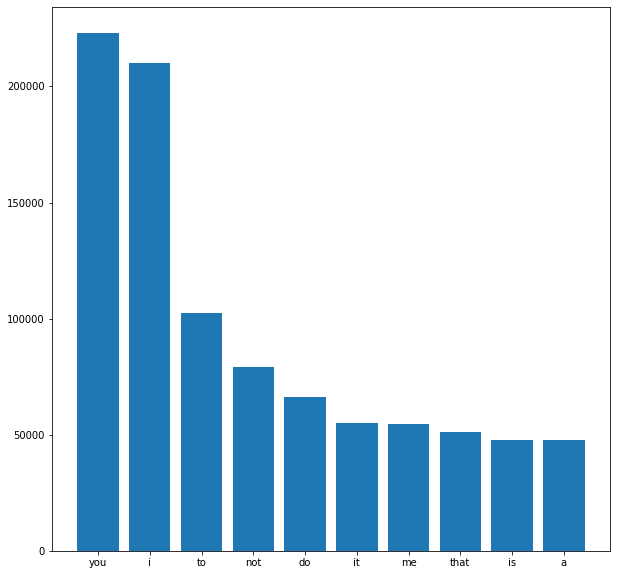

In [37]:

# Before removing checking occurances of stopwords in headline


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(message_df['message'])

Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
    

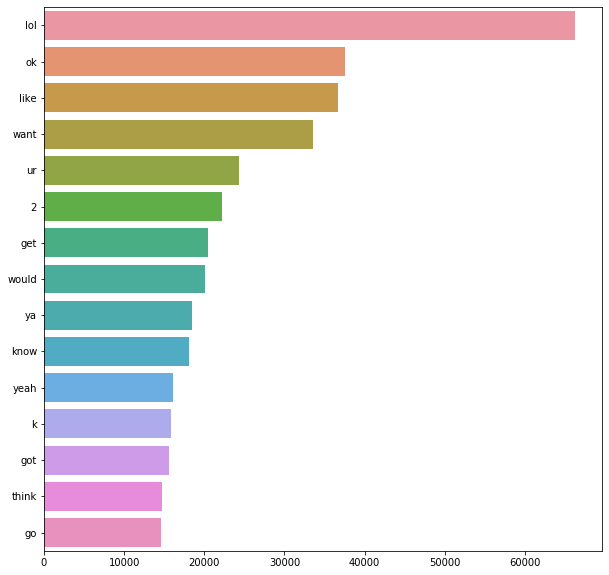

In [38]:

import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(message_df['message'])

In [41]:

# Removing stopwords 
message_df['tokenized_title'] = message_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
message_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in message_df['tokenized_title']]

message_df.sample(10, random_state = 5)

,message,tokenized_title,tokenized_title_join
739850,ask alot of questions though lol,"[ask, alot, questions, though, lol]",ask alot questions though lol
295234,yeah who is going to take you,"[yeah, going, take]",yeah going take
802919,i know what to do with a girl on my lap,"[know, girl, lap]",know girl lap
534552,they must look nice on you,"[must, look, nice]",must look nice
366942,realy,[realy],realy
823383,its up to you,[],
823744,jeep,[jeep],jeep
61317,she is on,[],
725536,but you have to know how she is right,"[know, right]",know right
89426,i c,[c],c


In [42]:
# for sake of simplicity, showing 10 messages based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in message_df['tokenized_title'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('ask', 'NN'), ('alot', 'NN'), ('questions', 'NNS'), ('though', 'IN'), ('lol', 'NN')]
[('yeah', 'NN'), ('going', 'VBG'), ('take', 'VB')]
[('know', 'VB'), ('girl', 'NN'), ('lap', 'NN')]
[('must', 'MD'), ('look', 'VB'), ('nice', 'JJ')]
[('realy', 'NN')]
[]
[('jeep', 'NN')]
[]
[('know', 'VB'), ('right', 'NN')]
[('c', 'NNS')]


Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst


In [43]:

# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in c:\users\erum\anaconda3\lib\site-packages (1.1)


C:\Users\Erum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


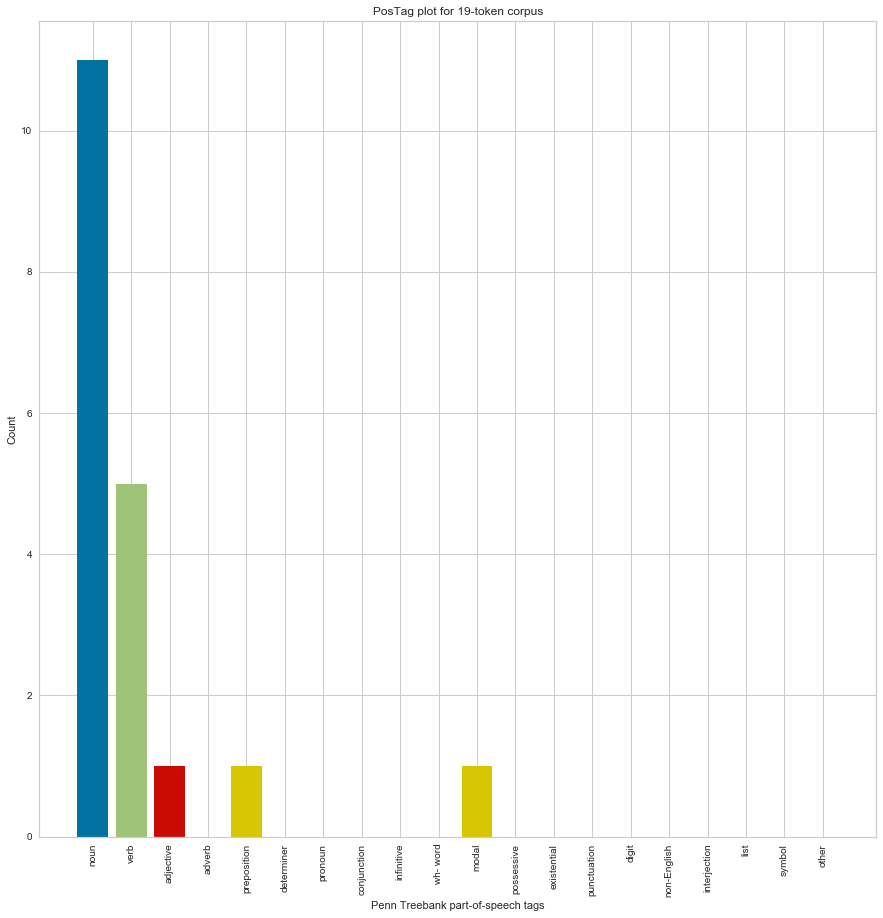

In [44]:

# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()


# Exploring some SpaCy functionalities

In [46]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047114 sha256=cd2661d4e57be2f0f689ddc2fb6e4fa1e40c777bdd2edb11907ceb1487f74920
  Stored in directory: C:\Users\Erum\AppData\Local\Temp\pip-ephem-wheel-cache-3t7kilge\wheels\b7\0d\f0\7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [45]:
import nltk 

for sentence in tagged_stanzas:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern) 
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('ask', 'NN'), ('alot', 'NN'), ('questions', 'NNS'), ('though', 'IN'), ('lol', 'NN')]
(S (NP ask/NN) (NP alot/NN) questions/NNS though/IN (NP lol/NN))

[('yeah', 'NN'), ('going', 'VBG'), ('take', 'VB')]
(S (NP yeah/NN) going/VBG take/VB)

[('know', 'VB'), ('girl', 'NN'), ('lap', 'NN')]
(S know/VB (NP girl/NN) (NP lap/NN))

[('must', 'MD'), ('look', 'VB'), ('nice', 'JJ')]
(S must/MD look/VB nice/JJ)

[('realy', 'NN')]
(S (NP realy/NN))

[]
(S )

[('jeep', 'NN')]
(S (NP jeep/NN))

[]
(S )

[('know', 'VB'), ('right', 'NN')]
(S know/VB (NP right/NN))

[('c', 'NNS')]
(S c/NNS)



In [47]:

import spacy
nlp = spacy.load('en_core_web_sm')
nlp

# Dependency Parsing

In [50]:
from spacy import displacy

for sentence in message_df['message'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  ask alot of questions though lol


Sentence is:  yeah who is going to take you


Sentence is:  i know what to do with a girl on my lap


Sentence is:  they must look nice on you


Sentence is:  realy


# Shallow Parsing using SpaCy

In [52]:
for sentence in message_df['message'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  ask alot of questions though lol
Chunked noun phrases found:  alot
Chunked noun phrases found:  questions

Sentence is:  yeah who is going to take you
Chunked noun phrases found:  who
Chunked noun phrases found:  you

Sentence is:  i know what to do with a girl on my lap
Chunked noun phrases found:  i
Chunked noun phrases found:  what
Chunked noun phrases found:  a girl
Chunked noun phrases found:  my lap

Sentence is:  they must look nice on you
Chunked noun phrases found:  they
Chunked noun phrases found:  you

Sentence is:  realy
Chunked noun phrases found:  realy



In [53]:

# Extract Verb Phrases
! pip install textacy

  Created wheel for pyemd: filename=pyemd-0.5.1-cp37-cp37m-win_amd64.whl size=67639 sha256=a8230857687b197537102e209b861d0b0912e7b2346db2a844b73f012898375d
  Stored in directory: c:\users\erum\appdata\local\pip\cache\wheels\91\ed\01\9f0beae80e84fc5053f69df3bf956308f2f1ca14b0bf422c32
  Created wheel for jellyfish: filename=jellyfish-0.8.2-cp37-cp37m-win_amd64.whl size=27249 sha256=c93a774c333670e91c72c4329d10032304c24ce0d7835c3d3ce3b4fb55f94a01
  Stored in directory: c:\users\erum\appdata\local\pip\cache\wheels\12\9e\c1\46af1db49a60a4adf555196c0ead132e4a36a2bd69b078e740
Successfully built pyemd jellyfish


# Named Entity Recognition (NER) with SpaCy

In [54]:

import textacy
# import warnings
# warnings.filterwarnings("ignore")

pattern = r'(<VERB>?<ADV>*<VERB>+)'

for sentence in message_df['message'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)

  sentence_doc = textacy.make_spacy_doc(sentence, lang='en_core_web_sm')
  verb_phrases = textacy.extract.pos_regex_matches(sentence_doc, pattern)

  # Print all Verb Phrase
  for chunk in verb_phrases:
    print("Verb Phrase found: ",chunk.text)
  print()

Sentence is:  ask alot of questions though lol
Verb Phrase found:  ask

Sentence is:  yeah who is going to take you
Verb Phrase found:  going
Verb Phrase found:  take

Sentence is:  i know what to do with a girl on my lap
Verb Phrase found:  know

Sentence is:  they must look nice on you
Verb Phrase found:  must look

Sentence is:  realy



C:\Users\Erum\anaconda3\lib\site-packages\textacy\extract.py:332: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
C:\Users\Erum\anaconda3\lib\site-packages\textacy\extract.py:332: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
C:\Users\Erum\anaconda3\lib\site-packages\textacy\extract.py:332: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
C:\Users\Erum\anaconda3\lib\site-packages\textacy\extract.py:332: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
C:\Users\Eru

In [55]:
for sentence in message_df['message'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  ask alot of questions though lol


C:\Users\Erum\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)



Sentence is:  yeah who is going to take you



Sentence is:  i know what to do with a girl on my lap



Sentence is:  they must look nice on you



Sentence is:  realy


In [56]:
for sentence in message_df['message'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  ask alot of questions though lol



Sentence is:  yeah who is going to take you



Sentence is:  i know what to do with a girl on my lap



Sentence is:  they must look nice on you



Sentence is:  realy


In [59]:

# now let's take a look at first 25 messages to get a better context of NER extractions

for sentence in df['message'].sample(25, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)

Sentence is:  cant


Sentence is:  oh you do? that's gotta suck


Sentence is:  nite


Sentence is:  the black


Sentence is:  idk ill have 2 think of sumthin


Sentence is:  im fuckin done with girls around here i think theres somn in the water


Sentence is:  yw


Sentence is:  ok ill try 2 b 2


Sentence is:  and there are so many other sexual expereicnes that I can share too...that I think you will enjoy


Sentence is:  was ur bf's as big as mine?


Sentence is:  *do


Sentence is:  hmmmmm


Sentence is:  Laying in my bed... Waiting for your ass to join me:p 7:15 PM


Sentence is:  ah, I sorta know where you live then. I was thinking about going to lehigh university


Sentence is:  cool lol


Sentence is:  then i saw u on


Sentence is:  i put it on teh grocery list just now


Sentence is:  would b cool


Sentence is:  Ooh what? 9:01 PM


Sentence is:  not to mention the last time I heard from that girl


Sentence is:  like girls at school that wud do stuff like that wud get a bad rep


Sentence is:  not yet


Sentence is:  im getting sleepy


Sentence is:  oh i


Sentence is:  mmmmmmm


In [67]:
#need to workmore here skipp this for now we dont have labbled data
from tqdm import tqdm, tqdm_notebook

nlp = spacy.load('en',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [72]:
#need to workmore here skipp this for now we dont have labbled data
frames=[]
for i in tqdm_notebook(range(1000)):
    doc = df.loc[i,'message']
    text_id = df.loc[i,'0']
    doc = nlp(doc)
    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['0'] = text_id
    frames.append(frame)

C:\Users\Erum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


KeyError: '0'

In [73]:
#need to workmore here skipp this for now we dont have labbled data
ner = pd.concat(frames)
ner.columns = ['Text','Start','Stop','NER_Type','id']
ner.tail()

ValueError: No objects to concatenate

NameError: name 'ner' is not defined

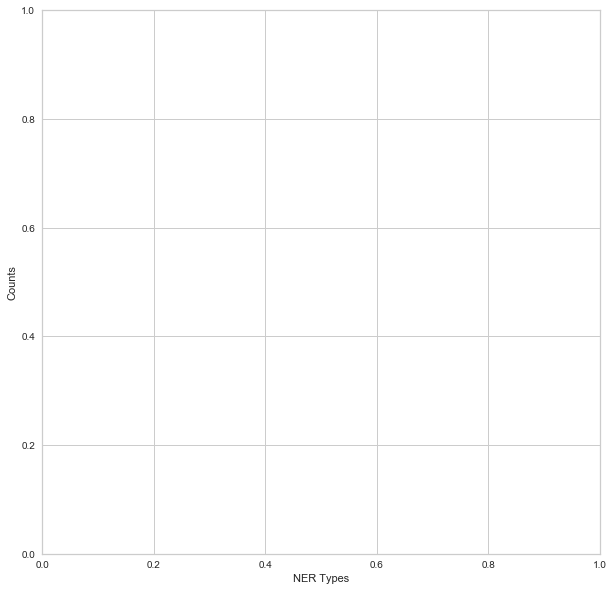

In [74]:
#need to workmore here skipp this for now we dont have labbled data
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

In [75]:
#need to workmore here skipp this for now we dont have labbled data
person = ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

NameError: name 'ner' is not defined

# NGRAM

In [76]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

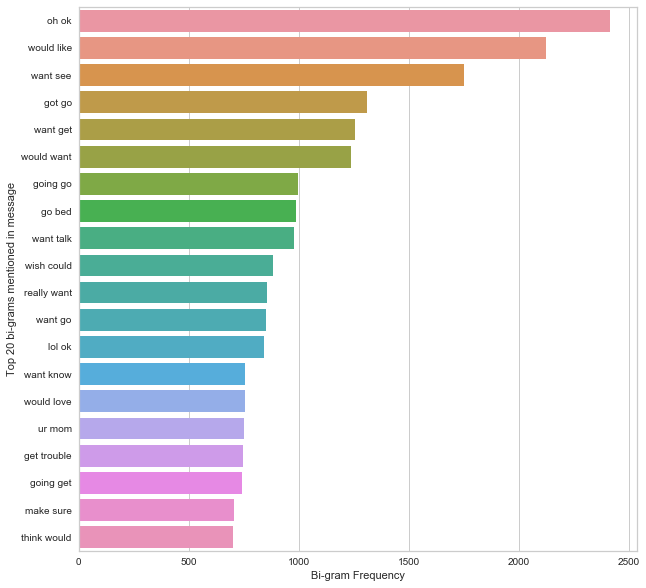

In [77]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in message")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(message_df['tokenized_title_join'],2)

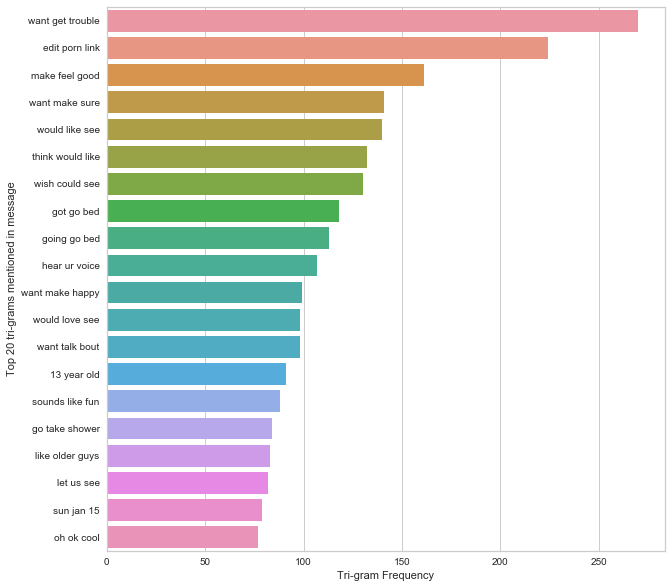

In [79]:
#Tri-grams 

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in message")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(message_df['tokenized_title_join'],3)